image.png

<h1><center><b>Segmentación del tejido adiposo del cuello en imágenes de TAC como marcador de la obesidad sarcopénica y la apnea del sueño</b></center></h1>
<h3><center><b>IMÁGENES Y VISIÓN</b></center></h3>
<h8><center>Sebastián Sierra<center><h8>
<h8><center>Pedro Salazar<center><h8>





image.png

## **Índice**
1. [**Resumen**](#id1)
2. [**Introducción**](#id2)
3. [**Estado del arte**](#id3)
4. [**Método**](#id4)
5. [**Resultados**](#id5)
6. [**Discusión**](#id6)
7. [**Bibliografía**](#id7)


## **Resumen**<a name="id1"></a>


<p align="justify">
El desarrollo de este proyecto se centra en la construcción e implementación de una red neuronal, basada en aprendizaje supervisado, que permita realizar una segmentación semantica de una imagen TAC identificando los dos posibles tipos de tejido adiposo que se presentan en la misma. Tejido adiposo visceral y subcutaneo en el caso del abdomen, profundo y subcutaneo en el caso de imagenes TAC del cuello, se busca identificar y clasificar  cada uno de los pixeles de la imagen en una de estas catgorias (tejido adiposo o fondo). <br>
<p align="justify">
La finalidad del proyecto radica en poder crear una herramienta que permita apoyar investigaciones y análisis que buscan relacionar el tejido adiposo del cuello con patologias como  la obesidad sarcopénica y la apnea del sueño. Esto debido a que el aumento de tejido adiposo en áreas adyacentes a la parte superior de las vías respiratorias, específicamente a una la altura de las vértebras cervicales se relaciona con la probabilidad para presentar apnea. Existen otros tipos de indicadores que están en estudio debido a su posible relación como lo son la grasa abdominal, los hábitos de los pacientes, la obesidad, antecedentes familiares, el género de una persona entre otros.[2] Pero en el presente proyecto el análisis se centra unicamente en un modelo capas de sementar el tipo de grasa presente en el cuello para así contribuir con esta investigación. Algunos estudios que sustentan esto son:

* 	Adipose Tissue Deposition in Sleep Apnea [3]
* 	The impact of neck and abdominal fat accumulation on the pathogenesis of obstructive sleep apnea [4]
* 	Sarcopenic obesity is associated with obstructive sleep apnea: A population‐based study [5]


## **Introducción**<a name="id2"></a>
<p align="justify">
Se ha podido ver en diversos estudios médicos que el tejido adiposo del cuello puede ser un marcador clínico que se encuentra relacionad con la de la obesidad sarcopénica y la apnea obstructiva del sueño. La apena es considerada como u trasyorno en el cual se interrumpe o se hace muy superficial la respiración, el tipo mas comun de apnea es aquella que se da en el sueño y sucede cuando se da un colapso faríngeo repetido durante el sueño.


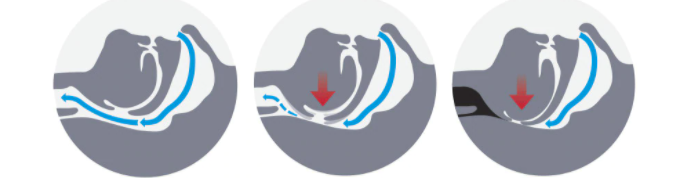


<p align="justify">
Una situación que entre otras cosas ocasiona que la calidad del sueño de las personas se redusca debido a que al no poder respirar en horas de la noche, se termina por ocasinar estres y disminuir la posibilidad de dormir por peridoods continuos debido a que constamente se da la sensación de estarse ahogando. los pacientes presenten una disminución en la calidad de su vida y presenten somnolencia diurna, fatiga, irritabilidad, y está asociada morbilidad y mortalidad cardiovascular [3]. Por otro lado, la obesidad sarcopénica hace alusión a la disminución que se da de masa muscular al mismo tiempo que aumenta la presencia de tejido graso. Esta situación puede conducir a múltiples problemas de salud relacionados debido a que los pacientes van a presentar una fuerza muscular proporcionalmente baja a su masa corporal, teniendo un mayor riesgo de discapacidad física, fragilidad e incluso morbilidad y mortalidad [4].
<p align="justify">
Teniendo esto en mente se propuso un método de segmentación de grasa subcutanea y profunda de cuello. Este es un problema un poco más complicado de lo que parece pues no contabamos con imágenes de cuello segmentadas que pudieramos usar para el entrenamiento de la red neuronal convolucional que se usó. Por otro lado sí contabamos con un conjunto de imágenes de abdomen segmentadas entonces se propuso un acercamiento en el que entrenamos con las imágenes de abdomen y validamos con un número limitado de segmentaciónes de cuello. Estas segmentaciones de cuello fueron realizadas manualmente por nosotros con ascesoría de un residente de radiología. 


## **Estado del arte**<a name="id3"></a>
<p align="justify">
En materia de segmentación automática de tejido abdominal y de cuello, los avances más recientes se centran en el uso de redes neuronales convolucionales. A continuación haremos un breve recorrido por los avances más recientes en el campo de la segmentación automática de tejido abdominal y de cuello.
<p align="justify">
Hasta hace poco uno de los acercamientos más usados para este tipo de aplicaciones era el de los átlases de características. Estos consisten en usar una imagen como atlas y deformarla hasta lograr que las estructuras de interés coincidan con estructuras en la imagen que se quiere segmentar. Este es un acercamiento que es muy efectivo en casos similares al atlas pero tiene serios problemas generalizando a casos diferentes. En particular por ejemplo, con este acercamiento no habría sido posible hacer lo que proponemos en este trabajo de entrenar con abdomen y validar con cuello. Este acercamiento ha perdido terreno rápidamente con el surgimiento de modelos de aprendizaje profundo capases de funcionar con cantidades relativamente pequeñas de casos de entrenamiento. 
<p align="justify">
En 2018 salió una publicación bajo el nombre "Automated Abdominal Segmentation of CT Scans for Body Composition Analysis Using Deep Learning" [0] en la que se usaron U-Nets para la segmentación. Esta arquitectura fue propuesta originalmente en [1] y es particularmente efectiva en aplicaciones biomedicas. En [0] se obtuvieron resultados muy prometedores y de hecho las U-Nets se han convertido rápidamente en el estándar en cuanto se segmentación de tejidos en tomografías axiales compuratizadas y resonancias magnéticas. Otros usos exitosos de este tipo de redes incluyen [2], donde se utilizan para cuantificar el músculo paraespinal en imágenes de resonancia magnética. Este acercamiento rápidamente reemplazó los algoritmos basados en atlases que se usaban para este tipo de aplicaciones hasta hace poco tiempo.

## **Método**<a name="**id4**"></a>



<p align="justify">
Para la construcción del modelo capaz de segmentar los dos posibles tipos de tejidos adiposos presente en el cuello (subcutáneo y profundo), se utilizó un dataset conformado por 514 imágenes TAC del abdomen de diferentes personas, con su respectiva segmentación del tejido adiposo presente en las mismas (subcutáneo y visceral). La hipótesis principal del proyecto se baso en la construcción de un modelo capaz de aprender a realizar la segmentación del tejido graso en imágenes abdomen y que a su vez esté en  capacidad de generalizar y segmentar el tejido graso en las imágenes del cuello. <br>



#### **Librerías necesarias**

In [ ]:
import os  
from glob import glob
import shutil
import argparse
import zipfile
import hashlib
import requests
from tqdm import tqdm
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import datetime, os
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
!pip install tensorflow_addons
import tensorflow_addons as tfa
AUTOTUNE = tf.data.experimental.AUTOTUNE

!pip install pydicom
!pip install pypng
!pip install bokeh
import pydicom as dicom
import PIL # optional
import pandas as pd
import cv2
import png
import matplotlib.pyplot as plt

from PIL import Image
import numpy
from google.colab.patches import cv2_imshow

import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()


#### **Dataset**

<p align="justify">
Como se mencionó previamente para el desarrollo del modelo se utilizó un dataset conformado por imágenes TAC del abdomen las cuales se encuentran en formato dicom (tanto las imágenes originales como las imágenes segmentadas), adicionalmente para facilitar la manipulación del dataset se organizó de la siguiente manera.

`<dataset root directory>` <br><br>
`___DATASETABDOMEN` <br>
`_______images` <br>
`__________training` <br>
`______________patient1.dcm` <br>
`______________patient2.dcm` <br>
`______________...` <br>
`__________validation` <br>
`______________patient400.dcm` <br>
`______________patient400.dcm` <br>
`______________...` <br>
`_______annotations` <br>
`__________training` <br>
`______________patient1.dcm` <br>
`______________patient2.dcm` <br>
`______________...` <br>
`__________validation` <br>
`______________patient400.dcm` <br>
`______________patient400.dcm` <br>

<font color=”blue” size="2"> Celdas enfocadas en realiza la preparación del ambiente junto con la carga del dataset </font>

In [ ]:
###################################################
# Creación de los directorios del dataset con las
# imágenes de abdomen junto con las imágenes 
# segmentadas
###################################################
directory = "DATASETABDOMEN"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "annotations"
parent_dir = "/content/DATASETABDOMEN/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "images"
parent_dir = "/content/DATASETABDOMEN/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "validation"
parent_dir = "/content/DATASETABDOMEN/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "training"
parent_dir = "/content/DATASETABDOMEN/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "training"
parent_dir = "/content/DATASETABDOMEN/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "validation"
parent_dir = "/content/DATASETABDOMEN/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

###################################################
# Creación de los directorios utilizados para 
# modificar el formato de las imágenes y cambiarles
# los nombres para poder ser utilizadas por el 
# modelo.
###################################################

directory = "RENAME"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "images"
parent_dir = "/content/RENAME/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "annotations"
parent_dir = "/content/RENAME/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "training"
parent_dir = "/content/RENAME/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "validation"
parent_dir = "/content/RENAME/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "validation"
parent_dir = "/content/RENAME/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "training"
parent_dir = "/content/RENAME/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


FileExistsError: ignored

In [ ]:
#same random numbers
SEED = 42

<font color=”blue” size="2"> Para realizar la carga del dataset este se subió a drive para realizar su importación de una forma mas rapida. </font>
https://drive.google.com/file/d/1iEy4VthCBqyhxuMc9QsZXZDY8qbrIJaE/view?usp=sharing

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
with zipfile.ZipFile('/content/gdrive/MyDrive/ima_abdomen/ABDOMENFINAL.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/ABDOMENFINAL')

#### **Visualización**

Se procede a realizar el análisis exploratorio para entender la naturaleza de las imágenes que conforman el dataset (tanto de las imágenes segmentadas como las imágenes originales).

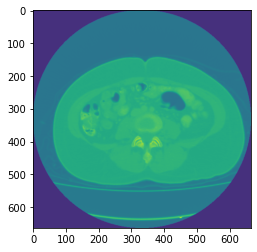

In [ ]:
#image path
image_path = '/content/ABDOMENFINAL/ABDOMENFINAL/images/validation/patient10_raw.dcm'
ds = dicom.dcmread(image_path)
plt.imshow( ds.pixel_array)

plt.show()

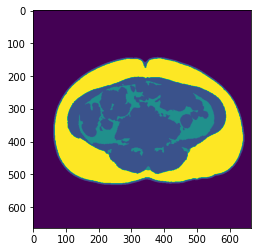

In [ ]:
#image path
image_path = '/content/ABDOMENFINAL/ABDOMENFINAL/annotations/validation/patient10_segmented.dcm'
ds = dicom.dcmread(image_path)
plt.imshow( ds.pixel_array)

plt.show()

<p align="justify">
En el dataset original las imágenes segmentadas cuentan con un total de 4 clases, la grasa subcutánea, la visceral, la región interna de los órganos y el fondo. Debido a que nuestro interés se basa solo en las 2 primeras clases, es necesario modificar las imágenes segmentadas originales con el fin de que la región interna de los órganos pertenezca a la misma clase del fondo de nuestra imagen. Adicionalmente para facilitar la lectura y la correlación entre las imágenes originales y sus etiqueta se modificaron los nombres de cada imagen para asegurar que ambas tengan el mismo nombre.


In [ ]:
# .dcm folder path
folder_path = "/content/ABDOMENFINAL/ABDOMENFINAL/images/training"
# png folder path
jpg_folder_path = "/content/RENAME/images/training"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)
    inicio=folder_path +'/'+ image
    seb = image.split('_')
    seb2 = seb[1].split('.')
    image2= seb[0]+'.'+seb2[1]
    despues= jpg_folder_path+'/'+image2
    os.rename(inicio, despues)

################################
################################

folder_path = "/content/ABDOMENFINAL/ABDOMENFINAL/images/validation"
jpg_folder_path = "/content/RENAME/images/validation"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)
    inicio=folder_path +'/'+ image
    seb = image.split('_')
    seb2 = seb[1].split('.')
    image2= seb[0]+'.'+seb2[1]
    despues= jpg_folder_path+'/'+image2
    os.rename(inicio, despues)

################################
################################

folder_path = "/content/ABDOMENFINAL/ABDOMENFINAL/annotations/validation"
jpg_folder_path = "/content/RENAME/annotations/validation"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)
    inicio=folder_path +'/'+ image
    seb = image.split('_')
    seb2 = seb[1].split('.')
    image2= seb[0]+'.'+seb2[1]
    despues= jpg_folder_path+'/'+image2
    os.rename(inicio, despues)

############################
############################

folder_path = "/content/ABDOMENFINAL/ABDOMENFINAL/annotations/training"
jpg_folder_path = "/content/RENAME/annotations/training"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    #print(folder_path +'/'+ image)
    inicio=folder_path +'/'+ image
    seb = image.split('_')
    seb2 = seb[1].split('.')
    image2= seb[0]+'.'+seb2[1]
    despues= jpg_folder_path+'/'+image2
    os.rename(inicio, despues)


########################
########################

#### **Preparación de los datos**

<p align="justify">
Como se mencionó anteriormente todas nuestras imágenes se encuentran en formato dcom. En este, entre otras diferencias para representar el valor de cada píxel se utiliza un total 16 bits, esto permite manejar muchas más escalas y tener una mayor cantidad de detalles. Aun así, no siempre resulta productivo trabajar con imágenes con estas escalas. Esto en términos de que en algunos casos a pesar de manejar un rango mayor de valores posibles para cada píxel en las imágenes que se manejan no se alcanza toda esa amplitud, adicional a esto, imágenes más pesadas conllevan a tener tiempos de entrenamiento más extensos.  Analizando este trade-off se optó por escalar el valor de las imágenes originales a una escala de 8 pixeles a través de una normalización de las mismas.

In [ ]:
###################################################
# Conversión y ajuste de formato
###################################################

# .dcm folder path
folder_path = "/content/RENAME/images/validation"
# output folder path
jpg_folder_path = "/content/DATASETABDOMEN/images/validation"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    #print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)
    shape = ds.pixel_array.shape

###################################################
# Conversión a float np array para evitar overflow
# y underflow 
###################################################

    image_2d = ds.pixel_array.astype(float)

###################################################
# Reescala 
###################################################

    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128

# uint
    image_2d_scaled = np.uint8(image_2d_scaled)



    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)


In [ ]:

folder_path = "/content/RENAME/images/training"
jpg_folder_path = "/content/DATASETABDOMEN/images/training"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    #print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)   
    shape = ds.pixel_array.shape
    image_2d = ds.pixel_array.astype(float)
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128
    image_2d_scaled = np.uint8(image_2d_scaled)
    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)

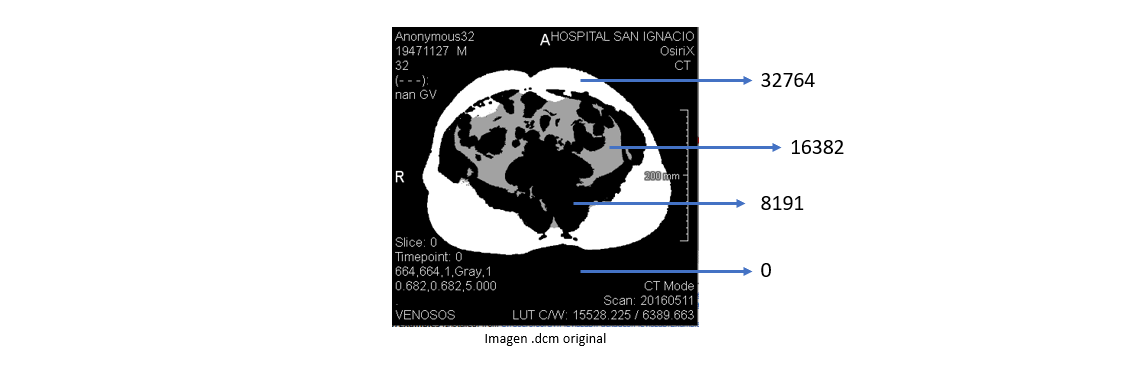

<p align="justify">
Para eliminar la región interna de los órganos, y con ayuda de la visualización de las imágenes a traves del software MeVisLab, en el momento de realizar la escala de las imágenes segmentadas se implemento un recorrido en donde todos los píxeles que presentaban un valor de 8191 fueron convertidos en cero, misma categoria que presenta el fondo.

In [ ]:
folder_path = "/content/RENAME/annotations/validation"
jpg_folder_path = "/content/DATASETABDOMEN/annotations/validation"

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    #print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)
    shape = ds.pixel_array.shape
    image_2d = ds.pixel_array.astype(float)
    #print(image_2d[2][2])
    

###################################################
# Arreglo de categorias
###################################################

    xw,yw = image_2d.shape
    for n in range(0,xw):
      for m in range (0,yw):
        if image_2d[n][m]== 8191:
          image_2d[n][m]=0


    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128
    image_2d_scaled = np.uint8(image_2d_scaled)

    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)

In [ ]:

folder_path = "/content/RENAME/annotations/training"
jpg_folder_path = "/content/DATASETABDOMEN/annotations/training"


images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    #print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)
    shape = ds.pixel_array.shape
    image_2d = ds.pixel_array.astype(float)
###################################################
# Arreglo de categorias
###################################################
    xw,yw = image_2d.shape
    for n in range(0,xw):
      for m in range (0,yw):
        if image_2d[n][m]== 8191:
          image_2d[n][m]=0

    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128.0
    image_2d_scaled = np.uint8(image_2d_scaled)
    # Write the PNG file
    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)


/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/numpy_handler.py:341: UserWarning: The length of the pixel data in the dataset (881792 bytes) indicates it contains excess padding. 357504 bytes will be removed from the end of the data
  warnings.warn(msg)


In [ ]:
root = "/content/"
dataset_path = root + "DATASETABDOMEN/images/"
training_data = "training/"
val_data = "validation/"

<p align="justify">
Para realizar el entrenamiento de la red se dividieron las 514 imágenes inciales como 484 imágenes de entrenamiento y 30 imágenes de validación. Hasta el momento solo se estan considerando las imágenes TAC correspondientes al abdomen, el objetivo inicial consistio en validar primero la eficiencia de nuestro modelo para segmentar el tejido adiposo en este tipo de imágenes y una vez se obtenga un buen desempeño proceder a evaluar el modelo directamente en imagenes del cuello.

In [ ]:
###################################################
# Chequeo de la cantidad de imagenes de validación  
# y entrenamiento que tenemos presentes.
###################################################

TRAINSET_SIZE = len(glob(dataset_path + training_data + "*.png"))
print(f"The Training Dataset contains {TRAINSET_SIZE} images.")

VALSET_SIZE = len(glob(dataset_path + val_data + "*.png"))
print(f"The Validation Dataset contains {VALSET_SIZE} images.")

The Training Dataset contains 484 images.
The Validation Dataset contains 30 images.


In [ ]:
def parse_image(img_path: str) -> dict:
    """Load an image and its annotation (mask) and returning
    a dictionary.
    Parameters
    img_path : str
        Image (not the mask) location.
    Returns
    dict
        Dictionary mapping an image and its annotation.
    """
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.uint8)
    mask_path = tf.strings.regex_replace(img_path, "images", "annotations")
    mask_path = tf.strings.regex_replace(mask_path, "jpg", "jpg")
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.where(mask == 255, np.dtype('uint8').type(0), mask)

    return {'image': image, 'segmentation_mask': mask}

In [ ]:
###################################################
# Construcción de datasets de entrenamiento y 
# validación
###################################################
train_dataset = tf.data.Dataset.list_files(dataset_path + training_data + "*.png")
train_dataset = train_dataset.map(parse_image)

val_dataset = tf.data.Dataset.list_files(dataset_path + val_data + "*.png")
val_dataset =val_dataset.map(parse_image)

<font color=”blue” size="2"> Celdas enfocadas para preparar los datos para nuestro modelo </font>

In [ ]:
###################################################
# Normalización de las imagenes de 0 a 1
###################################################

@tf.function
def normalize(input_image: tf.Tensor, input_mask: tf.Tensor) -> tuple:
    """Rescale the pixel values of the images between 0.0 and 1.0
    compared to [0,255] originally.
    Parameters
    input_image : tf.Tensor [SIZE,SIZE,3].
    input_mask : tf.Tensor [SIZE,SIZE,1].
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

###################################################
# Rotación de imagen original y de la imagen segmentada
###################################################
@tf.function
def load_image_train(datapoint: dict) -> tuple:

    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

###################################################
# Normalización de las imagenes de Test
###################################################

@tf.function
def load_image_test(datapoint: dict) -> tuple:
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [ ]:
BATCH_SIZE = 5
BUFFER_SIZE = 1000
IMG_SIZE = 128
dataset = {"train": train_dataset, "val": val_dataset}

###################################################
# Preparación del set de Entrenamiento
###################################################
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

###################################################
# Preparación del set de Validación
###################################################
dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])


<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>


Por ultimo, una vez que el dataset ya se encuentra preparado se procede a visualizar las imágenes originales y con siu correspondiente imagen segmentada.

In [ ]:
def display_sample(display_list):
    plt.figure(figsize=(12, 12))
    title = ['Input Image', 'Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

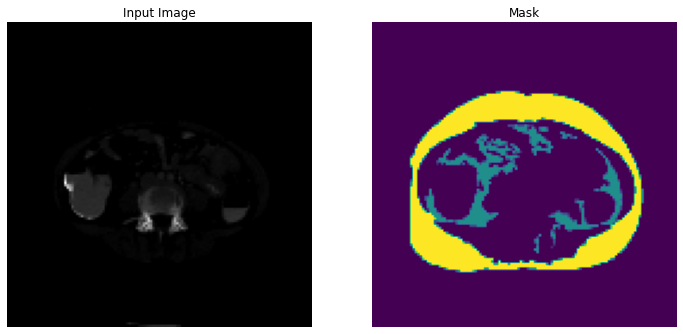

In [ ]:
###################################################
# Imagen de entrenamiento
###################################################
for image, mask in dataset['train'].take(12):
    sample_image, sample_mask = image, mask

display_sample([sample_image[0], sample_mask[0]])

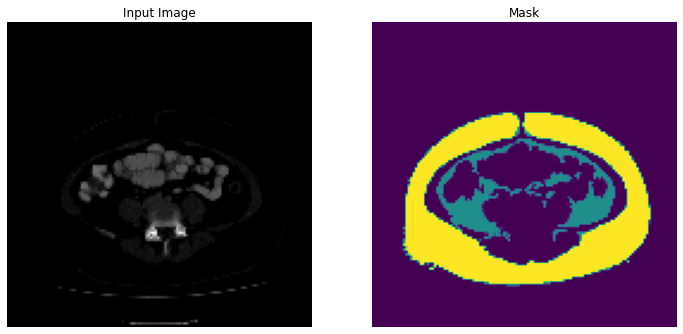

In [ ]:
###################################################
# Imagen de validación
###################################################
for image, mask in dataset['val'].take(12):
    sample_image, sample_mask = image, mask

display_sample([sample_image[0], sample_mask[0]])

#### **Selección del Modelo**

<p align="justify">
Debido a que el modelo que se desea construir debe realizar tareas de segmentación de imagenes, especificamente segmentación semantica. Se espera clasificar cada pixel en una clase en particular, pero no se realiza distinción entre objetos de la misma clase. Por ejemplo, si hay dos tijeras en la imagen ambas tendrían la misma clasificación. Para realizar este tipo de segmentación, es necesario entender toda la estructura de la escena, por que no basta con averiguar que objetos hay en la imagen, sino también conocer que píxeles corresponden a cada objeto.  <br> <br>

Teniendo esto en cuenta, se contemplaron otras consideraciones: <br>


*  <p align="justify">Para poder realizar una correcta segmentación de una imagen es necesario tener información espacial de la misma (es importante conocer la distribución de los píxeles, sus n-vecinos y su estructura) si vemos la imagen únicamente como un vector, para nuestra red va a ser más complicado poder estimar gran cantidad de relaciones. Siendo así, se optó por usar una red neuronal convoluciónal CNN en donde la entrada y la salida también sean una imagen y no un vector de longitud fija.


*  <p align="justify">Tras la busqueda y el análisis del estado del arte, de modelos y redes implementadas que permiten realizar este tipo de tarea. Se encontró que las prinicipales arquitecturas se basan en una estructura de tipo encoder y decoder. En donde las primeras capas de la red proceden a aprender conceptos de bajo nivel, como bordes y colores y las capaz de últimos niveles aprenden conceptos mas relevantes como por ejemplo objetos. 
Según este tipo de arquitecturas, en la etapa del encoder se busca reducir la imagen aumentando el numero de canales de la misma hasta llegar a un tensor de baja resolución y despues de esto se proceden a añadir nuevas capas de convolución y de muestreo con el fin de disminuir el número de canales y reconstruir una imagen con la información previamente extraída.
Cuando se busca realizar una clasificación semántica a la salida del encoder vamos a tener un tensor con información sobre los objetos de la imagen y seguido a esto, el decodificador en su busqueda de reconstruir la imagen original va a ser el encargado de construir los mapas de segmentación. <br>  En otras palabras, se busca reestringir la red para forzarla a aprender una nueva representación de los datos y luego hacer que esta tenga que reconstruir la entrada pero a traves de esa representación intermedia de baja dimensionalidad.




<p align="justify">
Ahora, según el estado del arte utilizar solo un encoder y un decoder ocasiona que haya una gran cantidad de pérdida de información, por lo cual para solucionar esto, se suelen implemenar "skip connections" que permiten que el decoder acceda a información de bajo nivel producidas por capas  intermedias del encoder. De esta manera, se logra mejorar significativamente la información necesaria para reconstruir el mapa de segmentación.

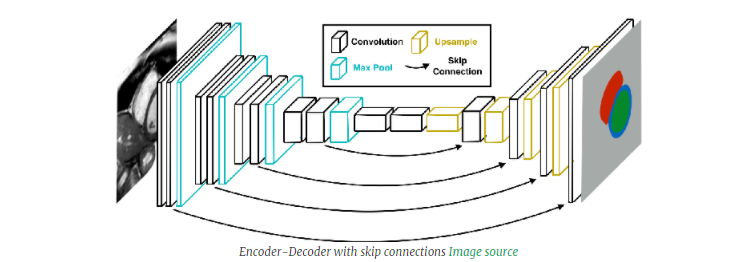

Siendo así se procedio a seleccionar las UNET, para realizar la tarea propuesta de la segmentación de tejido adiposo.

<p align="justify">
La Unet de forma general consta principalmente de dos secciones. Por un lado una codificación de la imagen de entrada. Esta sección permite que la red vaya delimitando poco a poco la información más relevante de la imagen. Luego, entra a una etapa de decodificación en la cual la red intenta reconstruir la imagen con solamente la información importante, logrando así una segmentación de los objetos. En la figura a continuación, se puede observar una arquitectura ejemplo de una UNet, su forma de U se debe a la manera en la cual se realizan los "skips embeding" y se propaga la información de capas de codificación a su capa simetria de decodificación  


<font color=”blue” size="2"> El link del paper original de la Unet se encuentra en: </font>  https://arxiv.org/abs/1505.04597



![figure 1](https://yann-leguilly.gitlab.io/img/unet_1/figure_1.png)

**Principales Capas**


*   Capa convolucional: 
<p align="justify">
En donde cada neurona no se encuentra conectada a un pixel indemendiente en la imagen sino por el contrario a píxeles en sus campos receptivos, a los cuales les aplica la operacion de convolución respectiva. A su vez la segunda capa esta conectada a una pequeña zona de la primera capa. Lo que se busca con estas capas es que las primeras capas encuentren funciones de bajo nivel y luego se reunan en funciones de nivel superior en la capa siguiente. <br><br>
*   Capa de pooling: 
<p align="justify">
El objetivo de estas capas es submuestrar la entrada para reducir la carga computacional, el uso de memoria y el úmero de parámetros. Para estas capas es necesario definir su tamaño el stride y el tipo de padding. Este tipo de capas no tiene pesos asociados, solo mapean la salida aplicando funciones como el máximo o el promedio.




**Función de perdida** <br>
Para evaluar el desempeño de nuestro modelo se estan comparando el valor de los pixeles a la entrada frente el valor de los pixeles a la salida. Para esto, se esta utilizando la función de  SparseCategoricalCrossentropy() de tensorflow debido a que tenemos varias clases. <br><br>

**Hyperparámetros** <br>
Por el momento se han considerado los sigueintes hyperparámetros:
*   **activation:** (RELU) La función de activación para las neuronas. Si se selecciona unas no-apropiada se corre el riesgo de que se saturen las neuronas o se llene todo de ceros.
*   **kernel_initializer:** (he-normal) Inicializador para la matriz de pesos del kernel. Define la discribución de probabilidad con la que se asigan esos pesos antes de la primera iteración. 
*   **epoch:** El número de de veces que se pasa todo el dataset de entrenamiento por el modelo. Si es demasiado alto se corre el riesgo de sobreajustar el modelo a los datos de entrenamiento. 

* **Optimizador:** Se utilizó el optimizador RectifiedAdam en donde se rectifica la taza de aprendizaje adaptativa, con el fin de reducir la varianza alta que se suele presentar al comienzo del entrenamiento cuando se maneja una taza de aprendizaje adaptativa, de esta manera se busca al mismo tiempo que acelerar la convergencia del algoritmo mejorar su estabilidad. MAs información se encuentra en: https://arxiv.org/abs/1908.03265


#### **Modelamiento**

A continuación se presenta la contrucción del modelo y la arquitectura escogida, en este caso nuestra UNET. Toda la estructura se contruyo usando keras y tensorflow.


In [ ]:
N_CHANNELS=3
#
# Implementación de la UNET
#

dropout_rate = 0.5
input_size = (IMG_SIZE, IMG_SIZE, N_CHANNELS)

initializer = 'he_normal'


# Capas correspondientes al encoder
# 1
inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

#  3
max_pool_enc_3 = MaxPooling2D(pool_size=(2, 2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_3)

#  4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ----------- #
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ----------- #

# Capas correspondientes al decoder
# 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

#  2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

#  4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)

#Capa de salida
output = Conv2D(151, 1, activation = 'softmax')(conv_dec_4)

In [ ]:
model = tf.keras.Model(inputs = inputs, outputs = output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Predicción**

Una vez que el modelo se encuentra creado y compilado, pasamos a la fase de entrenamiento. <br>

In [ ]:
###################################################
# Funciones especificas para poder visualizar
# los resultados (mascaras de nuestras preduicciones).
###################################################


def create_mask(pred_mask: tf.Tensor) -> tf.Tensor:
        # Entrada [IMG_SIZE, IMG_SIZE, 3]
        # Salida [1, IMG_SIZE, IMG_SIZE, 1]
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask
    
def show_predictions(dataset=None, num=1):
        # Entrada [IMG_SIZE, IMG_SIZE, 3]
        # Salida [1, IMG_SIZE, IMG_SIZE, 3]
        one_img_batch = sample_image[0][tf.newaxis, ...]
        inference = model.predict(one_img_batch)
        pred_mask = create_mask(inference)
        display_sample([sample_image[0], sample_mask[0],
                        pred_mask[0]])

Una vez que el modelo se encuentra construido, se procedio a realizar un "sanity check" en donde se verificó que toda la red se encontrará correctamente conectada y no se presenten errores. Para esto, se evalúo el desempeño del modelo para predecir la máscara de una imagen. (Por el momento no se ha realizado entrenamiento, solo con los pesos iniciales)

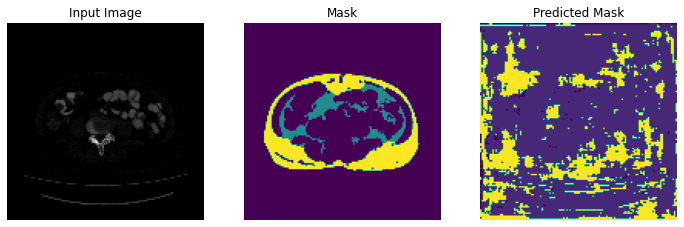

In [ ]:
for image, mask in dataset['val'].take(74):
    sample_image, sample_mask = image, mask

show_predictions()

<p align="justify">
Como se puede ver en la parte izquierda tenemos la imagen de entrada, en la parte del medio la mascara original de dicha imagen y en la imagen de la derecha la salida de nuestro modelo. Como es de esperarse, la salida solo consta de ruido por que no se ha realizado ningun entrenamiento previamente. Por ende, ahora si se procede a realizar el primer entrenamiento con 10 épocas.

In [ ]:
EPOCHS =10

STEPS_PER_EPOCH = TRAINSET_SIZE // BATCH_SIZE
VALIDATION_STEPS = VALSET_SIZE // BATCH_SIZE

In [ ]:
# On GPU
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['val'])

Epoch 1/10
96/96 [==============================] - 16s 129ms/step - loss: 4.9963 - accuracy: 0.0014 - val_loss: 4.9642 - val_accuracy: 1.8921e-04
Epoch 2/10
96/96 [==============================] - 12s 129ms/step - loss: 4.8994 - accuracy: 1.0656e-04 - val_loss: 4.8157 - val_accuracy: 1.8921e-04
Epoch 3/10
96/96 [==============================] - 13s 131ms/step - loss: 4.6874 - accuracy: 1.0821e-04 - val_loss: 4.5293 - val_accuracy: 1.8921e-04
Epoch 4/10
96/96 [==============================] - 12s 129ms/step - loss: 4.2868 - accuracy: 1.0923e-04 - val_loss: 3.9628 - val_accuracy: 1.8921e-04
Epoch 5/10
96/96 [==============================] - 12s 128ms/step - loss: 2.8839 - accuracy: 0.1751 - val_loss: 1.0118 - val_accuracy: 0.8104
Epoch 6/10
96/96 [==============================] - 12s 127ms/step - loss: 0.9389 - accuracy: 0.7980 - val_loss: 0.8347 - val_accuracy: 0.8104
Epoch 7/10
96/96 [==============================] - 12s 126ms/step - loss: 0.8058 - accuracy: 0.7974 - val_loss: 0

Tras 10 epocas de entrenamiento se puede ver que se obtuvo un desempeño de: 

*   Training Loss: 0,5512
*   Training Accuracy: 0,8918
*   Validation Loss: 0.5436
*   Validation Accuracy: 0.8928



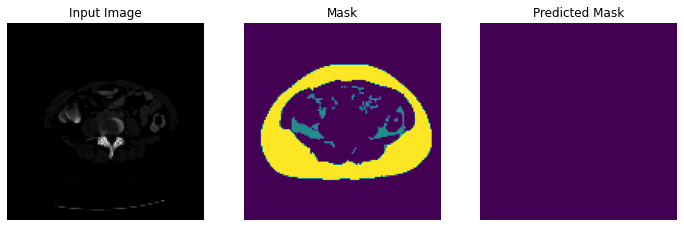

In [ ]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

<p align="justify">
Como se puede ver en la predicción realizada, la grasa subcutanea se encuentra relativamente bien clasificada, aún así no se realizó la clasificación de la grasa viceral. <br> Por tal motivo, se procedio a realizar un mejor entrenamiento y a la creación de nuevos callbacks que nos permitan ver el desempeño de nuestro modelo.

#### **Predicción x2**

<p align="justify">
Para tener una mejor percepción de lo que esta sucediendo aparte de las metricas del accuracy y a la función de perdida, se construllo el siguiente callback que permite realizar una predicción de una imagen del set de validación con el modelo que se obtiene despues de cada época de entrenamiento. De esta manera, podemos tener un estimador visual para ver que tan bien esta funcionando nuestro modelo. Adicionalmente en cada imagen que presenta el porcentaje en píxeles que fueron clasificados como grasa subcutanea o visceral.

*   GS = Grasa subcutanea
*   Gv = Grasa visceral o profunda



In [ ]:
def display_sample(display_list):
    plt.figure(figsize=(18, 18))
    sum=0
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        img=tf.keras.preprocessing.image.array_to_img(display_list[i])
        CVimage = numpy.array(img)
        #CVimage = cv2.cvtColor(CVimage, cv2.COLOR_BGR2GRAY) 
        #print(type(CVimage))
        #print((CVimage).shape)
        #hist = cv2.calcHist([CVimage],[0],None,[256],[0,256])
        #plt.plot(hist)
        plt.imshow(img)
        #cv2_imshow(CVimage)
        cont1=0
        cont2=0
        cont3=0
        cont4=0
        if sum!=0:
          x,y=CVimage.shape
          (unique, counts)=numpy.unique(CVimage,return_counts=True)
          frequencies = numpy.asarray((unique, counts)).T

          final=[]

          for u in frequencies:
            if (u[0])<=31:
              cont1+=u[1]
            if (u[0])<=63 and (u[0])>31:
              cont1+=u[1]            
            if (u[0])<=95 and (u[0]>63):
              cont1+=u[1]
            if (u[0])<=127 and (u[0])>95:
              cont3+=u[1]
            if (u[0])<=191 and (u[0]>127):
              cont3+=u[1]
            if (u[0])<=255 and (u[0])>191:
              cont4+=u[1]
          final.append((0,cont1))
          final.append((63,cont2))
          final.append((127,cont3))
          final.append((255,cont4))
          #print(final)
        Tr="Gs:"+str(round(((cont4)/16384)*100,2))+"%"     
        Ts="Gv:"+str(round(((cont3)/16384)*100,2))+"%"      
        title = ['Input Image', 'True Mask' +" [ "+Tr+", "+Ts+" ] ", 'Predicted Mask'+" [ "+Tr+", "+Ts+" ] "]
        plt.title(title[i])
        sum+=1
        plt.axis('off')

    plt.show()

In [ ]:
# Celda para chequear que estamos utilizando la GPU
tf.device('/device:GPU:0')

Adicionalmente con el fin de tener el historial de cada una de nuestras metricas a lo largo del entrenamiento se implemento un callback que permite crear una lista por cada métrica.

In [ ]:
#Arreglo final !
EpochMatrix=[]
TLossMatrix=[]
TAccMatrix=[]
VLossMatrix=[]
VAccMatrix=[]
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
          print('La perdida promedio para la epoch {} es {:7.2f}.'.format(epoch, logs['loss']))
          EpochMatrix.append(epoch)
          TLossMatrix.append(logs['loss'])
          TAccMatrix.append(logs['accuracy'])
          VLossMatrix.append(logs['val_loss'])
          VAccMatrix.append(logs['val_accuracy'])


In [ ]:
EPOCHS = 100

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

callbacks = [
    # Mostrar predicción
    #DisplayCallback(),
    # metrics - tensorboard
    tensorboard_callback,
    # Implementación de un Earling Stoping
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    # Implementación para guardar el mejor modelo
    tf.keras.callbacks.ModelCheckpoint('best_model_unet.h5', verbose=1, save_best_only=True, save_weights_only=True),

    #Callbacks explicados previamente
    CustomCallback()
]

model = tf.keras.Model(inputs = inputs, outputs = output)

optimizer=tfa.optimizers.RectifiedAdam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer=optimizer, loss = loss,
                  metrics=['accuracy'])

In [ ]:
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

Epoch 1/100
96/96 [==============================] - 25s 160ms/step - loss: 0.6369 - accuracy: 0.7972 - val_loss: 0.5952 - val_accuracy: 0.8104

Epoch 00001: val_loss improved from inf to 0.59518, saving model to best_model_unet.h5
La perdida promedio para la epoch 0 es    0.64.
Epoch 2/100
96/96 [==============================] - 14s 150ms/step - loss: 0.6351 - accuracy: 0.7980 - val_loss: 0.6382 - val_accuracy: 0.8104

Epoch 00002: val_loss did not improve from 0.59518
La perdida promedio para la epoch 1 es    0.64.
Epoch 3/100
96/96 [==============================] - 14s 150ms/step - loss: 0.6153 - accuracy: 0.7985 - val_loss: 0.5724 - val_accuracy: 0.8104

Epoch 00003: val_loss improved from 0.59518 to 0.57243, saving model to best_model_unet.h5
La perdida promedio para la epoch 2 es    0.62.
Epoch 4/100
96/96 [==============================] - 15s 153ms/step - loss: 0.6004 - accuracy: 0.7957 - val_loss: 0.5706 - val_accuracy: 0.8104

Epoch 00004: val_loss improved from 0.57243 to 

Tras 100 epocas de entrenamiento se puede observar como en las epoca 54 se detiene el entrenamiento debido a que en las 10 epocas pasadas no hubo mejora en el desempeño. Aún así el desempeño mejoro notablemente obteniendo las siguientes metricas de desempeño:

*   Training Loss: 0,1722
*   Training Accuracy: 0,9595
*   Validation Loss: 0.2112
*   Validation Accuracy: 0.9500


In [ ]:
model_history.params

{'epochs': 100, 'steps': 96, 'verbose': 1}

In [ ]:
model.evaluate(dataset['val'],steps=10)

10/10 [==============================] - 1s 49ms/step - loss: 0.4647 - accuracy: 0.8536


[0.4646737277507782, 0.853649914264679]

Adicionalmente, se presentan la grafica con el desempeño que se obtuvo a lo largo de cada una de las epocas, en donde se puede ver como poco a poco el modelo fue mejorando. 

In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

Imágenes con los resultados de algunas predicciones

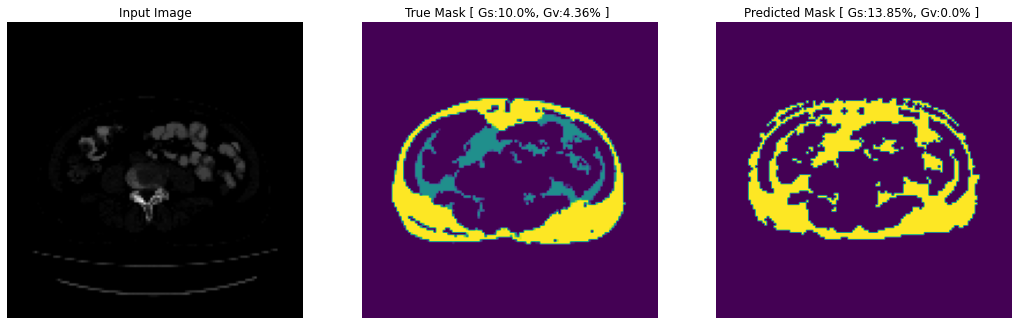

In [ ]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

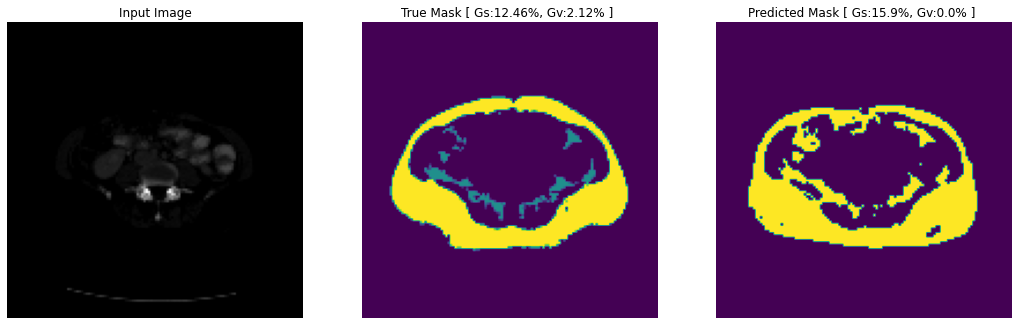

In [ ]:
for image, mask in dataset['val'].take(8):
    sample_image, sample_mask = image, mask

show_predictions()

#### **Implementación imagenes TAC del cuello**

De acuerdo con la hipotesis incial, una vez que el modelo se encuentra correctamente entrenado se procedio a evaluar su desempeño para segmentar las imagenes TAC del cuello.

Preparación de las imágenes <br>
Links con los .zip <br>
https://drive.google.com/file/d/1fxEOLwuFqvkpNh7ei7z8HawEmmug4KU_/view?usp=sharing
https://drive.google.com/file/d/1naYcWmx5urRC4QCSpi_k8WJgUk4ALH5I/view?usp=sharing

In [ ]:
# Nuevas carpeta para guardar las imagenes del cuello
directory = "validation2"
parent_dir = "/content/DATASETABDOMEN/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  
directory = "validation2"
parent_dir = "/content/DATASETABDOMEN/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  


directory = "cuelloX"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "annotations"
parent_dir = "/content/cuelloX/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "images"
parent_dir = "/content/cuelloX/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "validation"
parent_dir = "/content/cuelloX/annotations/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  

directory = "validation"
parent_dir = "/content/cuelloX/images/"
path = os.path.join(parent_dir, directory)  
os.mkdir(path)  



In [ ]:
with zipfile.ZipFile('/content/gdrive/MyDrive/ima_abdomen/annotations.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/cuelloX/annotations/validation')

In [ ]:
with zipfile.ZipFile('/content/gdrive/MyDrive/ima_abdomen/images.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/cuelloX/images/validation')


In [ ]:
with zipfile.ZipFile('/content/gdrive/MyDrive/ima_abdomen/cuello.zip',"r") as zip_ref:
  zip_ref.extractall(path='/content/cuello/test')

A continuación se pueden visualizar las imágenes del cuello que fueron segmentadas por nosotros. Para esto, se recurrio a utilizar el programa OROS, aún así a diferencia de la segmentación presentada en las imágenes de abdomen, el valor de los píxeles solo varia entre 0 y 2. Por lo cual con el objetivo de realizar la misma preparación que se realizo con las imagenes de abdomen, se procedio a modificar las imagenes *segmentadas* y reescalarlas. 

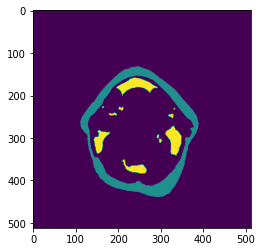

In [ ]:
image_path = '/content/cuelloX/annotations/validation/1.dcm'
ds = dicom.dcmread(image_path)
plt.imshow( ds.pixel_array)

plt.show()

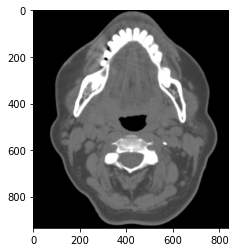

In [ ]:
image_path = '/content/cuelloX/images/validation/1.dcm'
image_path = '/content/cuello/test/cuello/10IM-0001-0001.dcm'

ds = dicom.dcmread(image_path)
plt.imshow( ds.pixel_array)

plt.show()

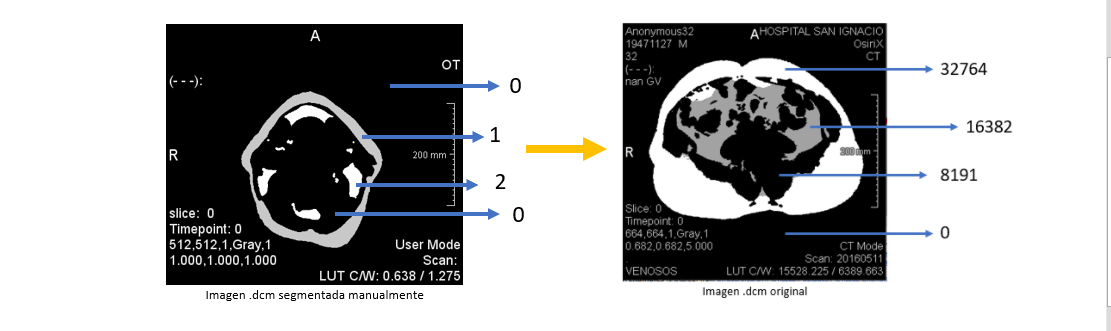

In [ ]:
# .dcm folder path
folder_path = "/content/cuelloX/annotations/validation"
# folder path
jpg_folder_path = "/content/DATASETABDOMEN/annotations/validation2"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)
    image_2d = ds.pixel_array.astype(float)
    shape = ds.pixel_array.shape
###################################################
# Arreglo de categorias
###################################################
    xw,yw = image_2d.shape
    for n in range(0,xw):
      for m in range (0,yw):
        if image_2d[n][m]== 1:
          image_2d[n][m]=32764
        if image_2d[n][m]== 2:
          image_2d[n][m]=16382
          
    # Rescaling 
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128
    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    # Write the PNG file
    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)


/content/DATASETABDOMEN/annotations/validation2/3.dcm
/content/DATASETABDOMEN/annotations/validation2/9.dcm
/content/DATASETABDOMEN/annotations/validation2/6.dcm
/content/DATASETABDOMEN/annotations/validation2/5.dcm
/content/DATASETABDOMEN/annotations/validation2/4.dcm
/content/DATASETABDOMEN/annotations/validation2/7.dcm
/content/DATASETABDOMEN/annotations/validation2/8.dcm
/content/DATASETABDOMEN/annotations/validation2/12.dcm
/content/DATASETABDOMEN/annotations/validation2/10.dcm
/content/DATASETABDOMEN/annotations/validation2/1.dcm
/content/DATASETABDOMEN/annotations/validation2/11.dcm
/content/DATASETABDOMEN/annotations/validation2/2.dcm


In [ ]:
from skimage.transform import resize

In [ ]:

# folder path
folder_path = "/content/cuelloX/images/validation"
# path
jpg_folder_path = "/content/DATASETABDOMEN/images/validation2"
images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    file=jpg_folder_path+'/'+image
    print(file)
    ds = dicom.dcmread(os.path.join(folder_path, image),force=True)

    image_2d = ds.pixel_array.astype(float)
    shape = ds.pixel_array.shape
    # Rescaling 
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128

    image_2d_scaled = np.uint8(image_2d_scaled)

    with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)




new_neck_test_path = "/content/cuello/test/cuello"
jpg_folder_neck_path = "/content/cuello/jpg"

images_path = os.listdir(new_neck_test_path)
for n, image in enumerate(images_path):
    file=jpg_folder_neck_path+'/'+image
    if image.startswith('.'):
      continue
    print(file)
    ds = dicom.dcmread(os.path.join(new_neck_test_path, image),force=True)
    


    data = ds.pixel_array

    print('The image has {} x {} voxels'.format(data.shape[0],data.shape[1]))


    down_samp = data[:512,:512]

    print('The downsampled image has {} x {} voxels'.format(down_samp.shape[0], down_samp.shape[1]))

    ds.PixelData = down_samp.tobytes()
    ds.Rows, ds.Columns, x = down_samp.shape



    image_2d = ds.pixel_array.astype(float)
    # image_2d = resize(image_2d, (512, 512), anti_aliasing=True)

    # image_2d = ds.pixel_array.astype(float)
    print(image_2d.shape)
    shape = image_2d.shape


    # Rescaling 
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 128

    image_2d_scaled = np.uint8(image_2d_scaled)

    #with open(f'{file.strip(".dcm")}.png', 'wb') as png_file:
    #    w = png.Writer(shape[1], shape[0], greyscale=True)
    #    w.write(png_file, image_2d_scaled)


/content/DATASETABDOMEN/images/validation2/3.dcm
/content/DATASETABDOMEN/images/validation2/9.dcm
/content/DATASETABDOMEN/images/validation2/6.dcm
/content/DATASETABDOMEN/images/validation2/5.dcm
/content/DATASETABDOMEN/images/validation2/4.dcm
/content/DATASETABDOMEN/images/validation2/7.dcm
/content/DATASETABDOMEN/images/validation2/8.dcm
/content/DATASETABDOMEN/images/validation2/12.dcm
/content/DATASETABDOMEN/images/validation2/10.dcm
/content/DATASETABDOMEN/images/validation2/1.dcm
/content/DATASETABDOMEN/images/validation2/11.dcm
/content/DATASETABDOMEN/images/validation2/2.dcm
/content/cuello/jpg/IM-0001-0003.dcm
The image has 874 x 874 voxels
The downsampled image has 512 x 512 voxels
(512, 512, 3)
/content/cuello/jpg/11IM-0001-0001.dcm
The image has 818 x 819 voxels
The downsampled image has 512 x 512 voxels
(512, 512, 3)
/content/cuello/jpg/6IM-0001-0003.dcm
The image has 854 x 854 voxels
The downsampled image has 512 x 512 voxels
(512, 512, 3)
/content/cuello/jpg/9IM-0001-00

Nueva ruta y path con las imagenes del cuello

In [ ]:
root = "/content/"
dataset_path = root + "DATASETABDOMEN/images/"
training_data = "training/"
val_data = "validation2/"

In [ ]:
TRAINSET_SIZE = len(glob(dataset_path + training_data + "*.png"))
print(f"The Training Dataset contains {TRAINSET_SIZE} images.")

VALSET_SIZE = len(glob(dataset_path + val_data + "*.png"))
print(f"The Validation Dataset contains {VALSET_SIZE} images.")

The Training Dataset contains 484 images.
The Validation Dataset contains 12 images.


Para la validación se contó con 11 imagenes segmentadas del cuello.

In [ ]:
train_dataset = tf.data.Dataset.list_files(dataset_path + training_data + "*.png", seed=SEED)
train_dataset = train_dataset.map(parse_image)

val_dataset = tf.data.Dataset.list_files(dataset_path + val_data + "*.png", seed=SEED)
val_dataset =val_dataset.map(parse_image)

test_dataset = tf.data.Dataset.list_files(jpg_folder_neck_path + "/*.png", seed=SEED)
test_dataset =test_dataset.map(parse_image)

In [ ]:
BATCH_SIZE = 5

BUFFER_SIZE = 1000

dataset = {"train": train_dataset, "val": val_dataset}

# -- Train Dataset --#
dataset['train'] = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset['train'] = dataset['train'].shuffle(buffer_size=BUFFER_SIZE, seed=SEED)
dataset['train'] = dataset['train'].repeat()
dataset['train'] = dataset['train'].batch(BATCH_SIZE)
dataset['train'] = dataset['train'].prefetch(buffer_size=AUTOTUNE)

#-- Validation Dataset --#
print(dataset['val'])

dataset['val'] = dataset['val'].map(load_image_test)
dataset['val'] = dataset['val'].repeat()
dataset['val'] = dataset['val'].batch(BATCH_SIZE)
dataset['val'] = dataset['val'].prefetch(buffer_size=AUTOTUNE)

#-- test Dataset --#
print(test_dataset)

test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.repeat()
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

print(dataset['train'])
print(dataset['val'])


<MapDataset shapes: {image: (None, None, 3), segmentation_mask: (None, None, 1)}, types: {image: tf.uint8, segmentation_mask: tf.uint8}>
<MapDataset shapes: {image: (None, None, 3), segmentation_mask: (None, None, 1)}, types: {image: tf.uint8, segmentation_mask: tf.uint8}>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>


Como se puede ver ya se encuentra el dataset con las imagenes del cuello preparadas a mano izquierda se ve la imagen de entrada y a la derecha la mascara que fue segmentada manualmente. Adicionalmente se puede apreciar el porcentaje de tejido adiposo subcutaneo y profundo.

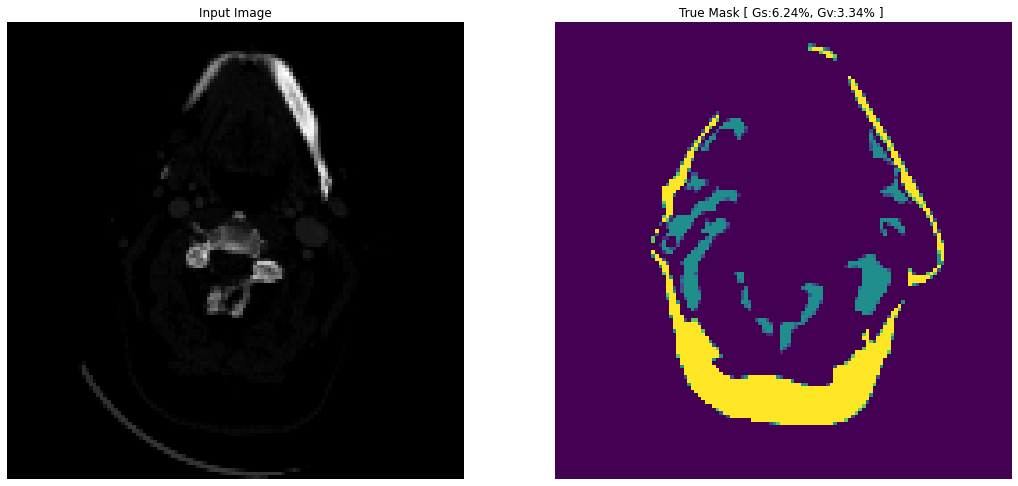

In [ ]:
for image, mask in dataset['val'].take(1):

    sample_image, sample_mask = image, mask

display_sample([sample_image[0], sample_mask[0]])

Debido a que el modelo ya se encuentra entrenado utilizando únicamente imágenes de abdomen se procedio a evaluar su capacidad de generalización

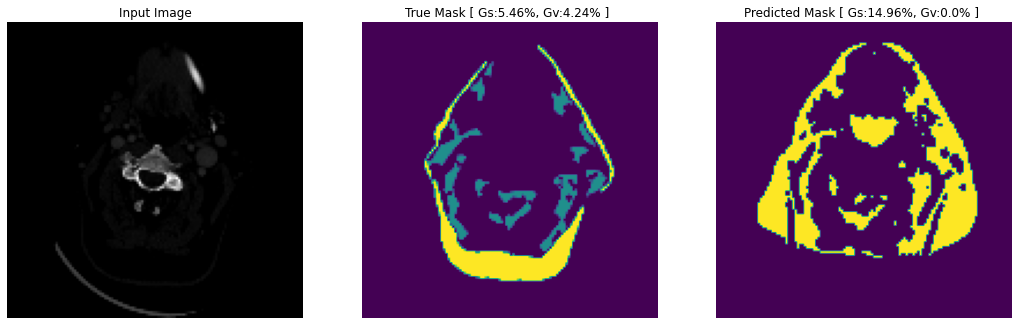

In [ ]:
for image, mask in dataset['val'].take(1):
    sample_image, sample_mask = image, mask

show_predictions()

Como se puede ver el desempeño obtenido es relativamente cercano, y los porcentajes de grasa predichos no se encuentran muy lejanos uno frente a otro. Siendo así se procedio a realizar un fine tunning del modelo original pero ahora el dataset de validación que se utiliza son las 11 imágenes segmentadas.

In [ ]:
EpochMatrix =[]
TLossMatrix=[]
TAccMatrix=[]
VLossMatrix=[]
VAccMatrix=[]
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

Epoch 1/100
96/96 [==============================] - 18s 153ms/step - loss: 0.4658 - accuracy: 0.8403 - val_loss: 0.3289 - val_accuracy: 0.8657

Epoch 00001: val_loss improved from 0.44856 to 0.32885, saving model to best_model_unet.h5
La perdida promedio para la epoch 0 es    0.47.
Epoch 2/100
96/96 [==============================] - 14s 147ms/step - loss: 0.4553 - accuracy: 0.8435 - val_loss: 0.3552 - val_accuracy: 0.8444

Epoch 00002: val_loss did not improve from 0.32885
La perdida promedio para la epoch 1 es    0.46.
Epoch 3/100
96/96 [==============================] - 15s 152ms/step - loss: 0.4591 - accuracy: 0.8459 - val_loss: 0.3203 - val_accuracy: 0.8701

Epoch 00003: val_loss improved from 0.32885 to 0.32033, saving model to best_model_unet.h5
La perdida promedio para la epoch 2 es    0.46.
Epoch 4/100
96/96 [==============================] - 14s 148ms/step - loss: 0.4499 - accuracy: 0.8497 - val_loss: 0.3499 - val_accuracy: 0.8489

Epoch 00004: val_loss did not improve from 

Tras realizar el fine tunning del entrenamiento se puede observar como en las epoca 13 se detiene el entrenamiento, esto sucede debido aque  debido a que en las 10 epocas pasadas no hubo mejora en el desempeño y principalmente por que la menor perdida de validación se encontró cuando el dataset de validación correspondia a imagenes de abdomen . Aún así el desempeño obtenido es el siguiente:

*   Training Loss: 0,1485
*   Training Accuracy: 0,9667
*   Validation Loss: 0.4251
*   Validation Accuracy: 0.9081

In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

Como se puede ver, en las graficas de desempeño de arriba, en el periodo del fine tunning el módelo todavia se comporta de una manera inestable. Adicionalmente, se puede apreciar como el accuracy de entrenamiento sigue mejorando pero el de validación no. Un comportamiento no deseado, pues demuestra que se esta perdiendo generalizació por parte del módelo, lo cual debido a que se estan manejando pocas imagenes y como el set de validación es diferente al de entrenamiento, es una situación que puede afectar notablemente el desempeño. 

Siendo así, y teniendo en cuenta las metricas de referencia se procedio a realizar el entrenamiento de nuestra red desde cero, pero esta ves el set de validación desde el origen van a ser nuestras imágenes TAC del cuello, una situación que puede contribuir a mejorar la capacidad de generalización de nuestro modelo original. Adicionalmente, se busca comparar ambos desempeños y escoger el mejor modelo. 

In [ ]:
###################################################
# Se realziarón pruebas variando el dropout_rate 
###################################################

dropout_rate = 0.2

input_size = (IMG_SIZE, IMG_SIZE, N_CHANNELS)
initializer = 'he_normal'
# -- Encoder -- #
# Block encoder 1
inputs = Input(shape=input_size)
conv_enc_1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer=initializer)(inputs)
conv_enc_1 = Conv2D(64, 3, activation = 'relu', padding='same', kernel_initializer=initializer)(conv_enc_1)

# Block encoder 2
max_pool_enc_2 = MaxPooling2D(pool_size=(2, 2))(conv_enc_1)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_2)
conv_enc_2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_2)

# Block  encoder 3
max_pool_enc_3 = MaxPooling2D(pool_size=(2, 2))(conv_enc_2)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_3)
conv_enc_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_3)

# Block  encoder 4
max_pool_enc_4 = MaxPooling2D(pool_size=(2, 2))(conv_enc_3)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(max_pool_enc_4)
conv_enc_4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_enc_4)
# -- Encoder -- #

# ----------- #
maxpool = MaxPooling2D(pool_size=(2, 2))(conv_enc_4)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(maxpool)
conv = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv)
# ----------- #

# -- Dencoder -- #
# Block decoder 1
up_dec_1 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv))
merge_dec_1 = concatenate([conv_enc_4, up_dec_1], axis = 3)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_1)
conv_dec_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_1)

# Block decoder 2
up_dec_2 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_1))
merge_dec_2 = concatenate([conv_enc_3, up_dec_2], axis = 3)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_2)
conv_dec_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_2)

# Block decoder 3
up_dec_3 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_2))
merge_dec_3 = concatenate([conv_enc_2, up_dec_3], axis = 3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_3)
conv_dec_3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_3)

# Block decoder 4
up_dec_4 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = initializer)(UpSampling2D(size = (2,2))(conv_dec_3))
merge_dec_4 = concatenate([conv_enc_1, up_dec_4], axis = 3)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(merge_dec_4)
conv_dec_4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
conv_dec_4 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = initializer)(conv_dec_4)
# -- Dencoder -- #

output = Conv2D(151, 1, activation = 'softmax')(conv_dec_4)

In [ ]:
model = tf.keras.Model(inputs = inputs, outputs = output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
###################################################
# Se realizarón pruebas variando el número de épocas
# aún así, con el earling stoping siempre se paro antes
# de llegar a la epoca 100
# Tambien se modifico el earling stoping para evitar
# paradas demasiado tempranas
###################################################


EPOCHS = 100

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

callbacks = [
    # to show samples after each epoch
    #DisplayCallback(),
    # to collect some useful metrics and visualize them in tensorboard
    tensorboard_callback,
    # if no accuracy improvements we can stop the training directly
    tf.keras.callbacks.EarlyStopping(patience=30, verbose=1),
    # to save checkpoints
    tf.keras.callbacks.ModelCheckpoint('best_model_unet.h5', verbose=1, save_best_only=True, save_weights_only=True),

    #learning rate adaptativo
    #tf.keras.callbacks.LearningRateScheduler(schedule, verbose=True)
    CustomCallback()
]

model = tf.keras.Model(inputs = inputs, outputs = output)

# # here I'm using a new optimizer: https://arxiv.org/abs/1908.03265
optimizer=tfa.optimizers.RectifiedAdam(lr=1e-3)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer=optimizer, loss = loss,
                  metrics=['accuracy'])

In [ ]:
EpochMatrix =[]
TLossMatrix=[]
TAccMatrix=[]
VLossMatrix=[]
VAccMatrix=[]
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=dataset['val'],
                    callbacks=callbacks)

Epoch 1/100
96/96 [==============================] - 28s 166ms/step - loss: 4.3110 - accuracy: 0.0496 - val_loss: 3.5183 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 3.51835, saving model to best_model_unet.h5
La perdida promedio para la epoch 0 es    4.31.
Epoch 2/100
96/96 [==============================] - 14s 150ms/step - loss: 2.3285 - accuracy: 0.5164 - val_loss: 1.0692 - val_accuracy: 0.9104

Epoch 00002: val_loss improved from 3.51835 to 1.06923, saving model to best_model_unet.h5
La perdida promedio para la epoch 1 es    2.33.
Epoch 3/100
96/96 [==============================] - 15s 152ms/step - loss: 1.3988 - accuracy: 0.8022 - val_loss: 0.8583 - val_accuracy: 0.8323

Epoch 00003: val_loss improved from 1.06923 to 0.85828, saving model to best_model_unet.h5
La perdida promedio para la epoch 2 es    1.40.
Epoch 4/100
96/96 [==============================] - 15s 151ms/step - loss: 1.0222 - accuracy: 0.7975 - val_loss: 0.6380 - val_accuracy: 0.9005

Epo

Métricas de desempeño obtenidas al final del entrenamiento

*   Training Loss: 0,1485
*   Training Accuracy: 0,9671
*   Validation Loss: 0.3749
*   Validation Accuracy: 0.9161[

In [ ]:
x = EpochMatrix
y0 = TLossMatrix
y1 = TAccMatrix
y2 = VLossMatrix
y3 = VAccMatrix

# output to static HTML file
output_file("linked.html")

# create a new plot
s1 = figure(title="Training Loss", width=440, plot_height=250,x_axis_label='epoch', y_axis_label='%')
s1.line(x, y0, line_width=2, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(title="Training Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s2.line(x, y1, line_width=2, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(title="Validation Loss",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s3.line(x, y2, line_width=2, color="olive", alpha=0.5)
s4 = figure(title="Validation Accuracy",width=400, height=250, x_range=s1.x_range,x_axis_label='epoch', y_axis_label='%')
s4.line(x, y3, line_width=2, color="blue", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2],[s3,s4]])

# show the results
show(p)

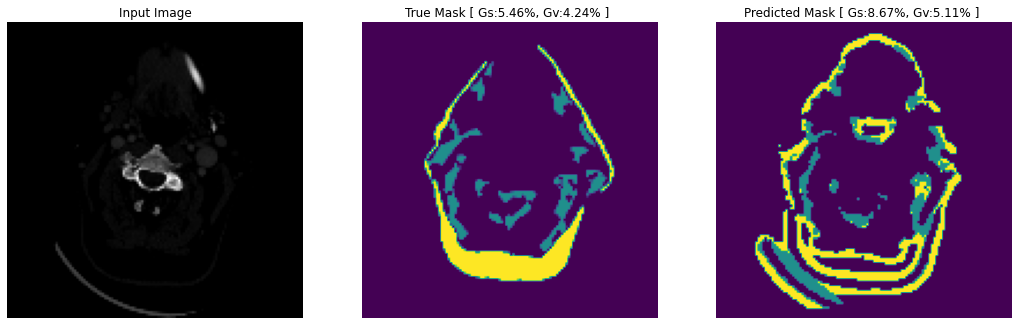

In [ ]:
for image, mask in dataset['val'].take(6):
    sample_image, sample_mask = image, mask

show_predictions()

In [ ]:
dataset['val']

<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>

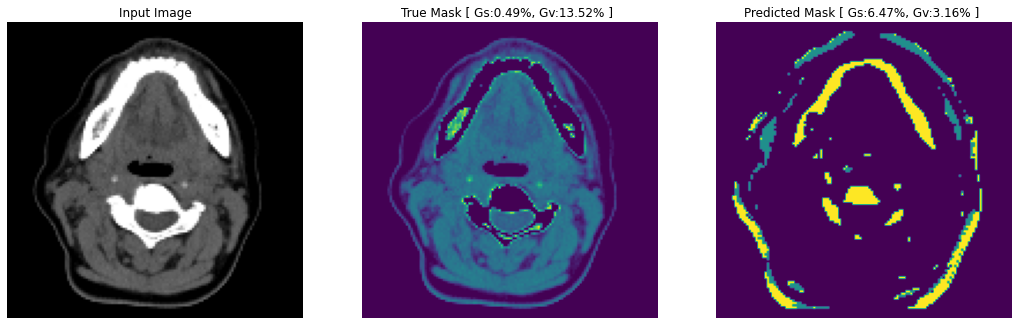

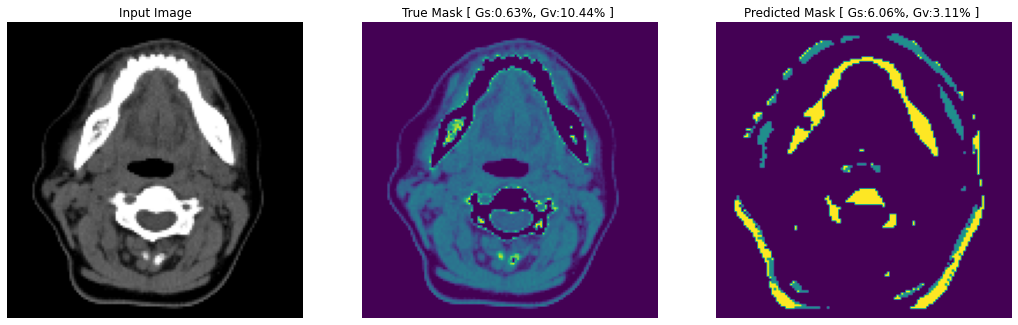

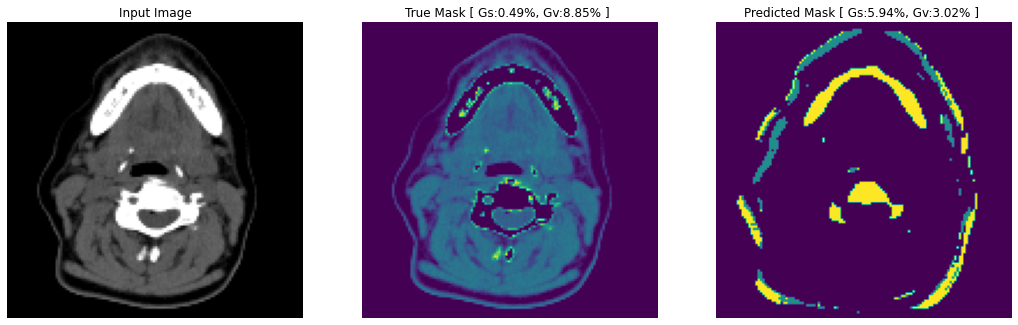

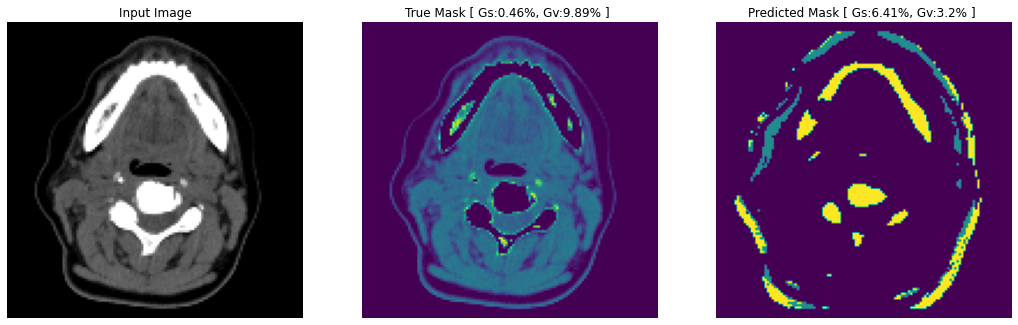

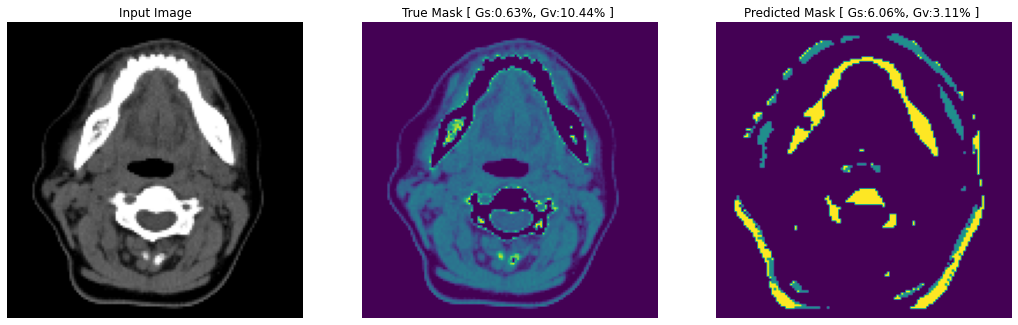

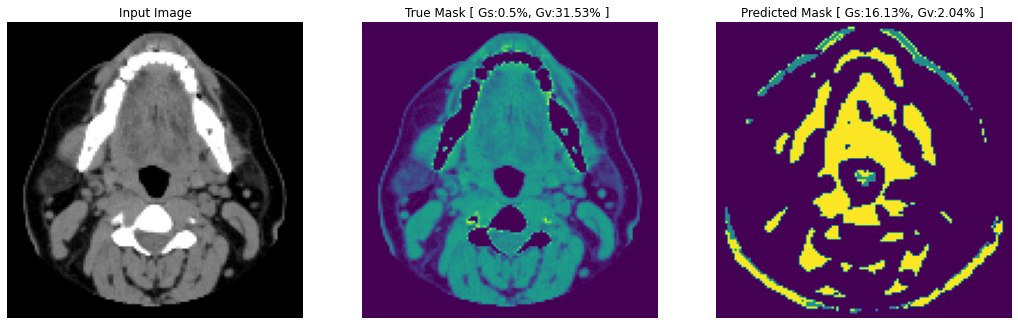

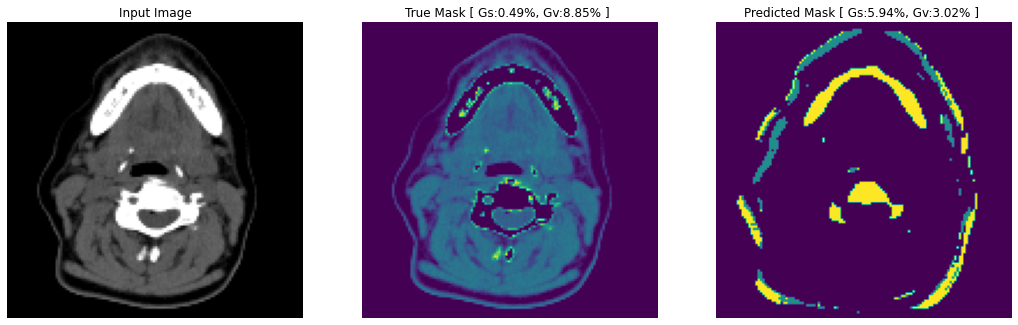

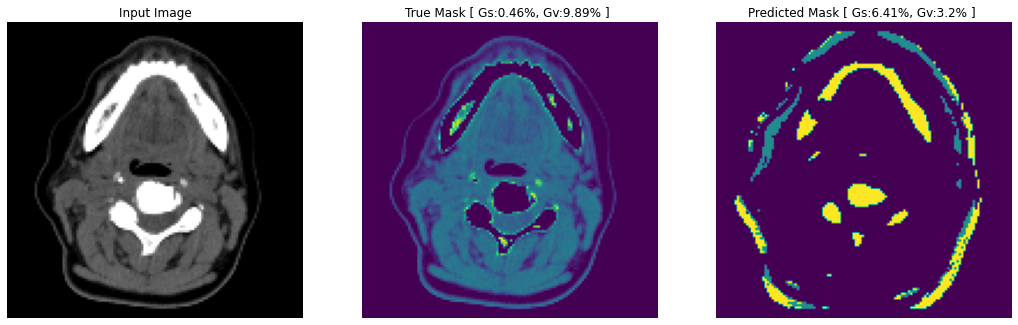

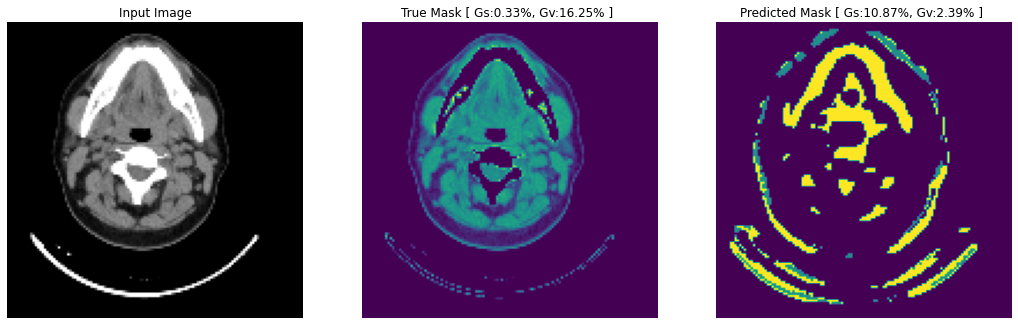

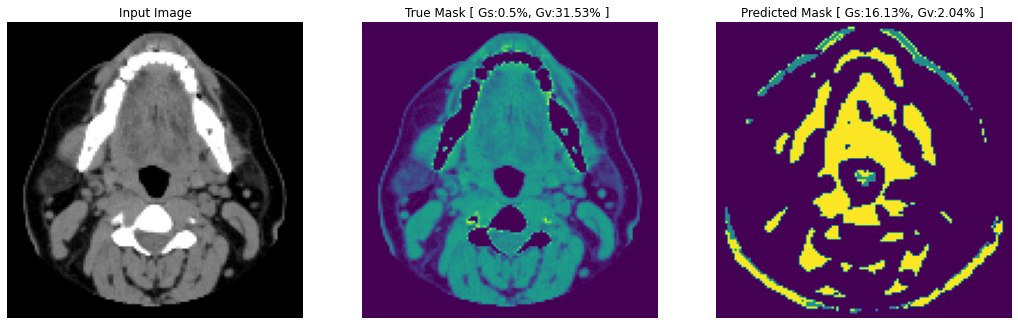

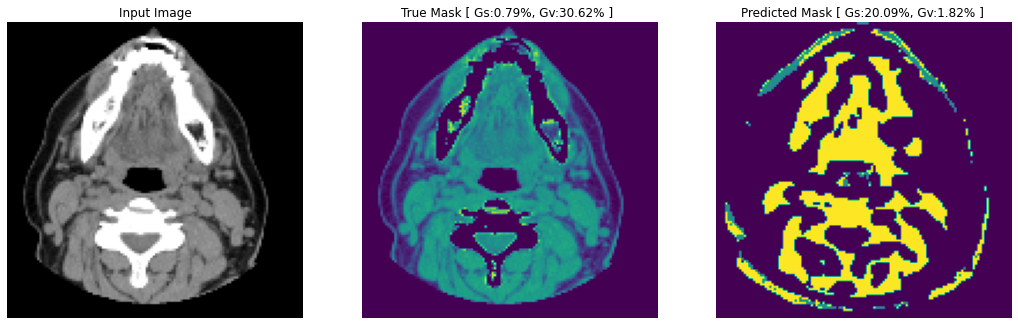

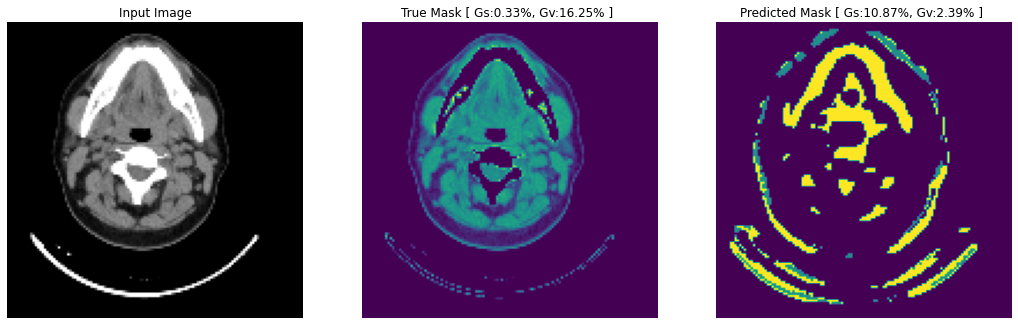

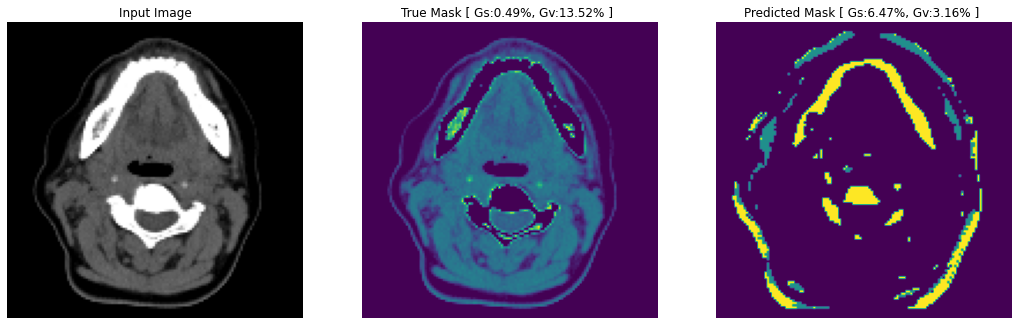

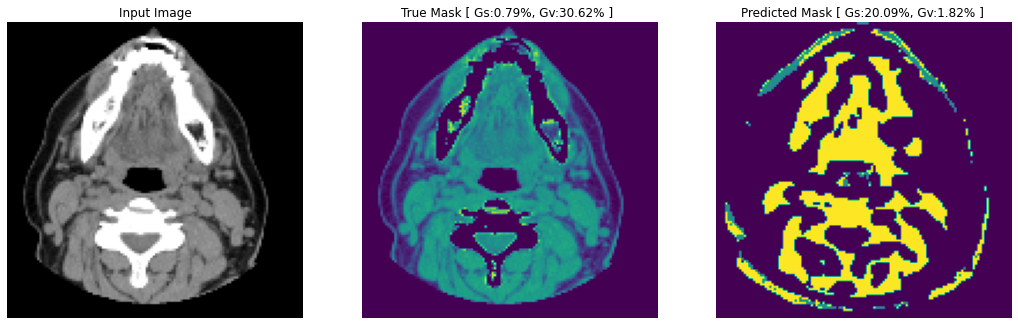

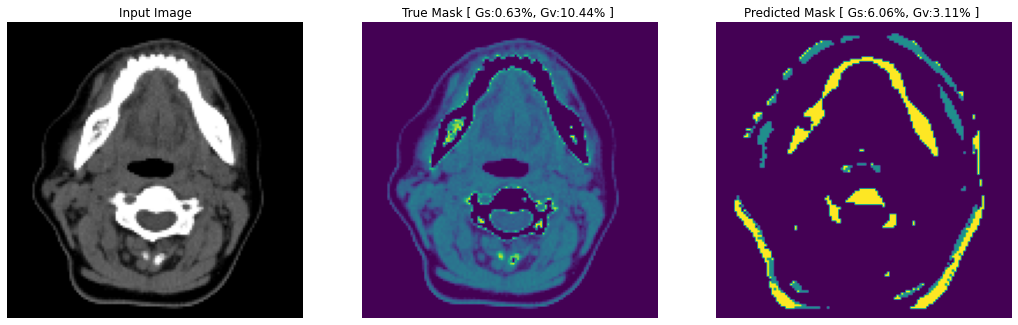

In [ ]:


for image, mask in test_dataset.take(15):
    sample_image, sample_mask = image, mask
    show_predictions()



In [ ]:
dataset

{'train': <PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>,
 'val': <PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>}

## **Resultados**<a name="id5"></a>


<p align="justify">
Con el fin de crear un modelo capaz de segmentar los dos posibles tipos de tejidos adiposos presente en el cuello (subcutáneo y profundo), y basados en que su finalidad radica en poder contribuir con investigaciones que buscan utilizar a los mismos como marcadores de obesidad sarcopénica y la apnea del sueño. Se procedió a realizar la construcción e implementación de Unet con keras. Adicionalmente, debido a que no se cuenta con un dataset lo suficientemente extenso de imagenes del cuello se procedio a realizar el entrenamiento de la red con imagenes del abdomen como se pudo apreciar en la sección anterior.

<p align="justify">
De la primera etapa de entrenamiento y validación sobre el dataset de imagenes de abdomen, se destaca la eficiencia y el funcionamiento del modelo implementado. A pesar de contar con poca cantidad de imágenes el resultado obtenido es alto y no se descarta que con una mayor cantidad de imágenes, hayan notorias mejoras. Como se puede ver en las métricas obtenidas, el módelo presento un buen desempeño. Adicionalmente de forma cualitatitiva tambien se logra apreciar que en las predicciones implementadas, se realiza una buena segmentación del tejido adiposo. Tambien de forma cualitativa se logra apreciar que el tejido adiposo subcutaneo presenta una mejor clasificación que el tejido adiposo visceral. A continuación se presenta la imagen del entrenamiento realizado en donde tambien se segmento la parte interna de los organos sobre las imágenes de abdomen.

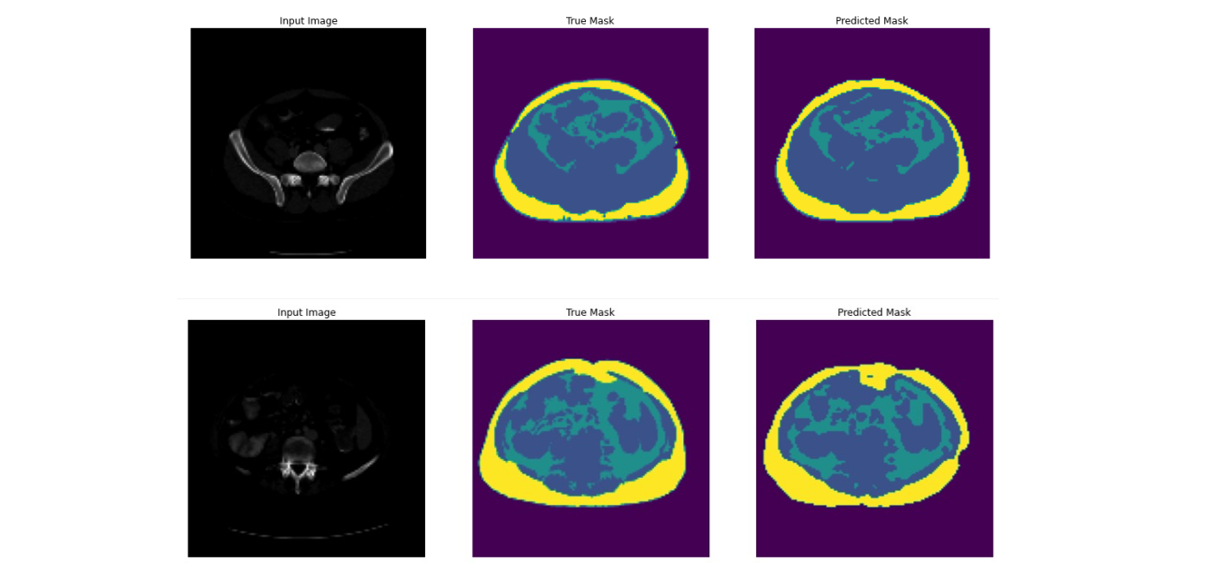

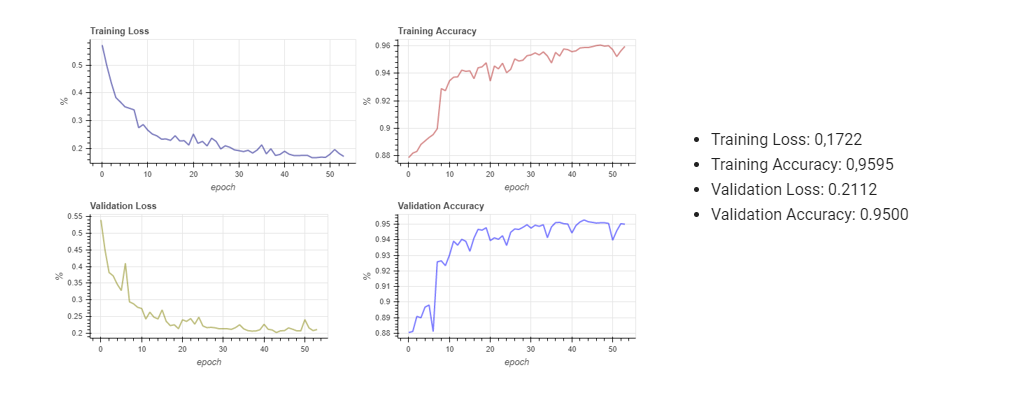

Adicionalmente, analizando ya el dataset de imágenes del cuello se logro apreciar que este modelo presenta una capacidad de generalización notaria, en donde tras realizar un fine tunning con tan solo 11 imagenes Tac del cuello se lograron obtener las siguientes metricas de desempeño: 

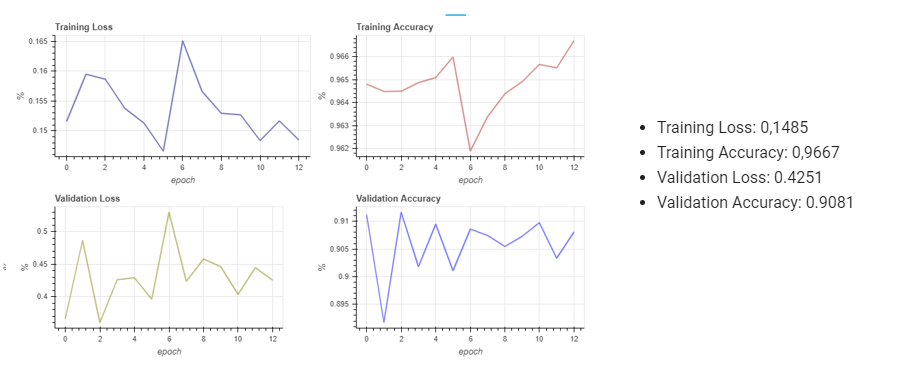

<p align="justify">
Aún así, como se puede ver a pesar de realizar un nuevo entrenamiento partiendo de los pesos definidos previamente con el entrenamiento en abdomen, no se presentaron notorias mejorias. tan solo con dos epocas se logro identificar una notable mejora y despues se evidencio un comportamiento similar a un sobre ajuste. Tambien se aprecia un buen comportamiento de forma cualitativa comparando la predición frente a la imagen segmentada, en las imagenes de cuello al igual que en abdomen se nota una mejor segmentación por parte del modelo de de la grasa subcutanea frente a la profunda.

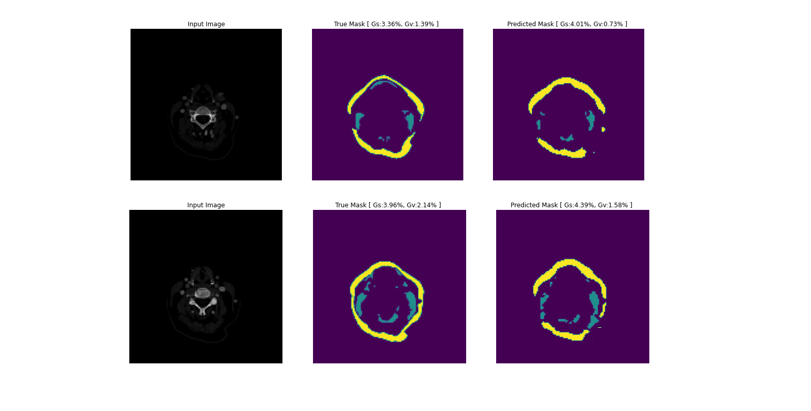

<p align="justify">
Por otro lado, se encontró que realizar el entrenamiento del modelo bajo el dataset de imagenes de abdomen (entrenamiento y validación) presenta un demsepño muy similar para segmentar las imagenes del cuello, frente al modelo entrenado con la unión de ambos tipos de imagenes (entrenamiento con abdomen y validación con cuello) aún así como se puede apreciar en las metricas obtenidas, el segundo modelo presento un mejor desempeño pero requirio de gran cantidad de tiempo adicional de entrenamiento. 


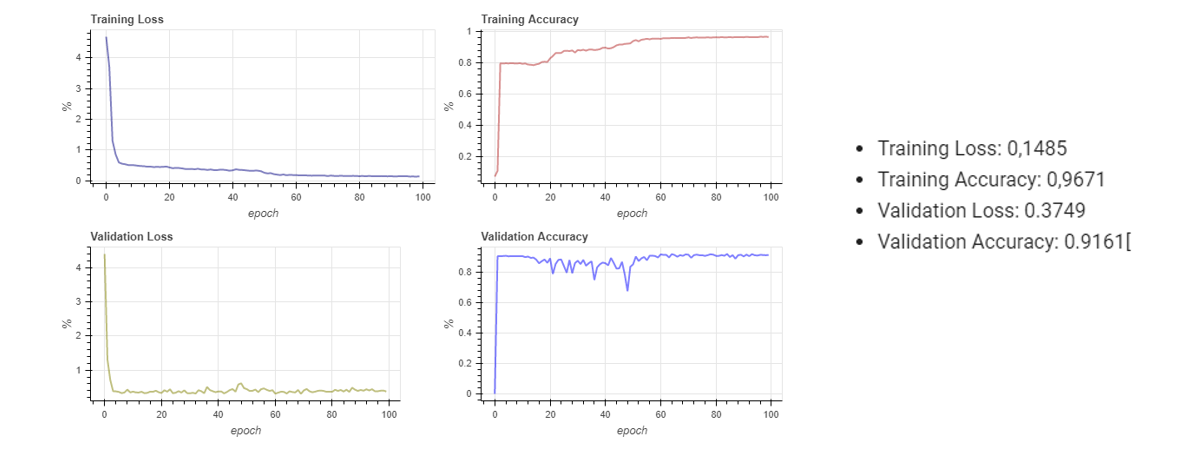

<p align="justify">
Adicionalmente se destaca la implementación del callback para mirar la predicción de la red a lo largo de cada epoca. Esto permitió ver el desempeño de forma cualitativa y realizar ajustes de una forma mucho mas rápida sobre los hyperpametros de la red.  Por ejemplo, moficaciones en el dropout_rate, en el learning_rate, o el kernel_initializer del optimizador ocacionaron en gran cantidad de casos que a la salida de la red se obtuvieran únicamente una salida en negro (todo se clasificaba como fondo). Unas situaciones que se lograron detener y apreciar de forma rapida gracias a este callback al igual que a el EarlyStopping. Es importante destacar que cambios en la normalización inicial de la imagen tambien permitió obtener notorias mejoras, al igual que se destaca la velodcidad del entrenamiento que se presenta en la red. En la imagen siguiente se puede apreciar un ejemplo de cómo se logran apreciar los cambios en la predicción de la imágen a lo largo del entrenamiento. 

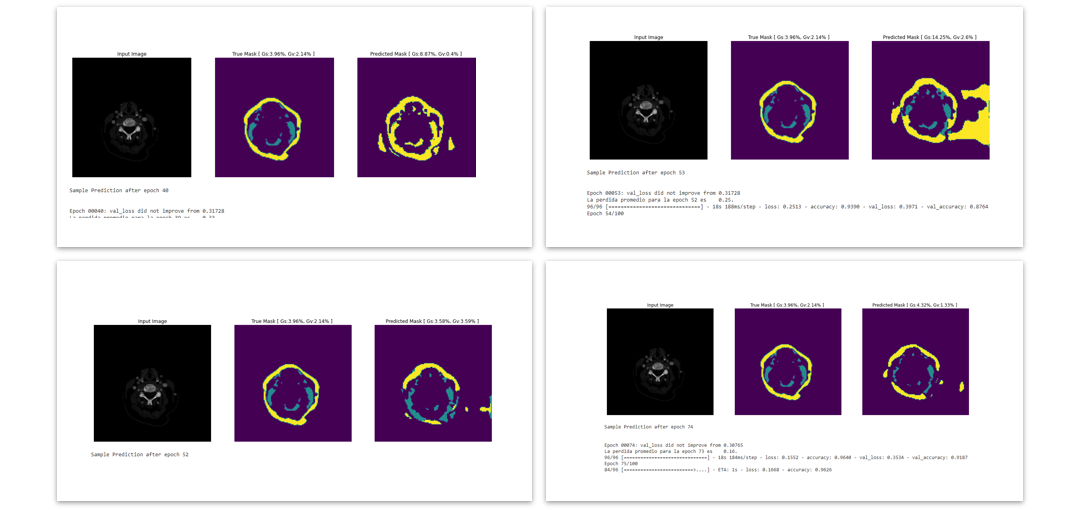

## **Discusión**<a name="id6"></a>
<p align="justify">
Con los resultados obtenidos podemos ver que se obtuvo un desempeño muy alentador. Es interesante y vale la pena explorar cómo fue posible realizar una generalización razonable por parte de neustro modelo para realizar la segmentación semantica de la grasa en el cuello, una vez que este fue entrenado con imagenes TAC de abdomen. Se logro apreciar como cuando el módelo fue entrenado unicamente con imagenes de abdomen y se evaluo su desemepño para segmentar las mismas, se alcanzo una Accuracy cerno del 95% y en las imagenes obtenidas se pudo apreciar que el porcentaje de grasa subcutanea y profunda es muy cercano a la realidad. Con esto en mente proponemos que con un dataset de una magnitud similar conformado únicamente por imágenes TAC del cuello segmentadas se podría haber logrado un resultado con la misma precisión. 
<p align="justify">
Además es importante notar que de todas maneras el dataset de abdomen no es muy grande cuenta con un total de 514 imagenes y el desempeño obtenido fue notoriamente alto. Adicionalmente, consideramos que contando con un dataset de imagenes mucho mas grande, mas allá deobtener un mejor desempeño en la clasificación de imagenes de abdomen, se esperaía obtener una mejor capacidad de generalización, lo cual permitiria mejorar también el desempeño que presenta el modelo para clasificar imágenes del cuello una vez que fue entrenado con las de abdomen.
<p align="justify">
Por otro lado es relevante resaltar la utilidad del callback desarollado para poder monitorear el desempeño del algoritmo cualitativamente a lo largo de las diferentes épocas. Este nos permite entender un poco mas que es lo que esta sucediendo a lo largo del entrenamiento y poder realziar las modificaciones pertinenetes. Aún así debido a que en este caso la predicción siempre se realiza sobre la misma imagen y permite ver como se van dando las mejoras de desempeño progresivamente, tambien sera utíl percibir el desempeño en predicciónes aleatorias para tener adicionalmente una idea un poco mas global de la segmentación. 
<p align="justify">
Finalmente nos parece relevante considerar un algoritmo alternativo reduciendo la transformación de las imágenes para preservar más bits de información. 


## **Bibliografía**<a name="id7"></a>

[0] Weston, A. D., Korfiatis, P., Kline, T. L., Philbrick, K. A., Kostandy, P., Sakinis, T., … Erickson, B. J. (2019). Automated Abdominal Segmentation of CT Scans for Body Composition Analysis Using Deep Learning. Radiology, 290(3), 669–679. https://doi.org/10.1148/radiol.2018181432

‌[1] Ronneberger, O., Fischer, P., & Brox, T. (2015b). U-Net: Convolutional Networks for Biomedical Image Segmentation. Retrieved from arXiv.org website: https://arxiv.org/abs/1505.04597

[2] Li, H., Luo, H., & Liu, Y. (2019). Paraspinal Muscle Segmentation Based on Deep Neural Network. Sensors, 19(12), 2650. https://doi.org/10.3390/s19122650

‌[3] Spicuzza, Lucia et al. “Obstructive sleep apnoea syndrome and its management.” Therapeutic advances in chronic disease vol. 6,5 (2015): 273-85. doi:10.1177/2040622315590318

[4] Santilli, Valter et al. “Clinical definition of sarcopenia.” Clinical cases in mineral and bone metabolism : the official journal of the Italian Society of Osteoporosis, Mineral Metabolism, and Skeletal Diseases vol. 11,3 (2014): 177-80.

[5] Piovezan, R. & Hirotsu, Camila & Moizinho, R. & Souza, Helton & D'Almeida, Vânia & Tufik, S. & Poyares, Dalva. (2019). “Sarcopenic obesity is associated with obstructive sleep apnea: a population-based study.” Sleep Medicine. 64. S303. 10.1016/j.sleep.2019.11.848. 
‌